In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_csv("dataset.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#### Data is balanced

In [21]:
cont_feat=[i for i in data.columns if len(data[i].unique())>25]

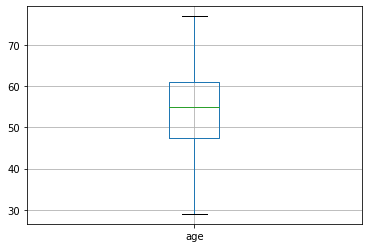

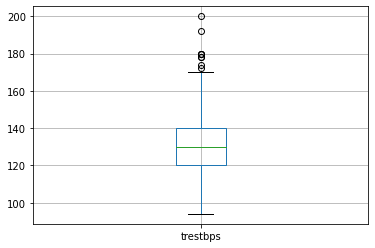

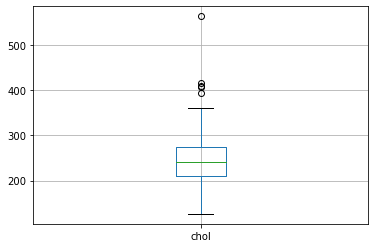

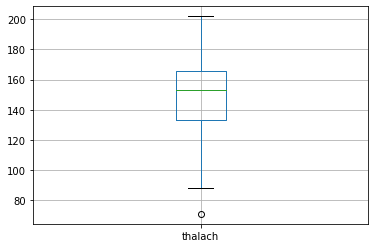

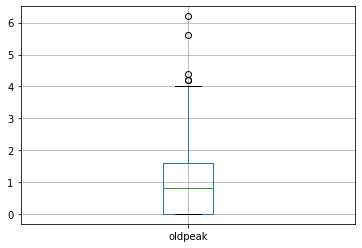

In [22]:
for i in cont_feat:
    data.boxplot(column=i)
    plt.show()

In [28]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,train_test_split
from xgboost import XGBRFClassifier,XGBClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
from collections import Counter

In [31]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=5)

In [32]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((227, 13), (76, 13), (227,), (76,))

In [34]:
Counter(trainy)

Counter({0: 100, 1: 127})

In [76]:
sv=SVC()
kn=KNeighborsClassifier()

In [37]:
xg=XGBClassifier()
xr=XGBRFClassifier()
rf=RandomForestClassifier()

In [41]:
xg.fit(trainx,trainy)

y1=xg.predict(testx)
print(accuracy_score(testy,y1)*100)
print(confusion_matrix(testy,y1))
print(classification_report(testy,y1))

C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.52631578947368
[[32  6]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.85      0.87      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [42]:
xr.fit(trainx,trainy)
y2=xr.predict(testx)
print(accuracy_score(testy,y2)*100)
print(confusion_matrix(testy,y2))
print(classification_report(testy,y2))

[10:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.78947368421053
[[33  5]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.88      0.95      0.91        38

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



In [43]:
rf.fit(trainx,trainy)
y3=rf.predict(testx)
print(accuracy_score(testy,y3)*100)
print(confusion_matrix(testy,y3))
print(classification_report(testy,y3))

89.47368421052632
[[33  5]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.88      0.92      0.90        38

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [77]:
sv.fit(trainx,trainy)
y4=sv.predict(testx)
print(accuracy_score(testy,y4)*100)
print(confusion_matrix(testy,y4))
print(classification_report(testy,y4))

63.1578947368421
[[17 21]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.71      0.45      0.55        38
           1       0.60      0.82      0.69        38

    accuracy                           0.63        76
   macro avg       0.65      0.63      0.62        76
weighted avg       0.65      0.63      0.62        76



In [78]:
kn.fit(trainx,trainy)
y5=kn.predict(testx)
print(accuracy_score(testy,y5)*100)
print(confusion_matrix(testy,y5))
print(classification_report(testy,y5))

67.10526315789474
[[21 17]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.72      0.55      0.63        38
           1       0.64      0.79      0.71        38

    accuracy                           0.67        76
   macro avg       0.68      0.67      0.67        76
weighted avg       0.68      0.67      0.67        76



In [62]:
import pickle

In [86]:
file=open("heartdiseaserf.pkl","wb")
pickle.dump(rf,file)

In [87]:
model=open("heartdisease.pkl","rb")
prediction=pickle.load(model)

In [74]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [88]:
file2="heartdiseasexgb.pkl"
pickle.dump(xr,open(file2,"wb"))

In [89]:
model=pickle.load(open(file2,"rb"))